In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model

base = automap_base()


In [6]:
# reflect the tables

base.prepare(engine, reflect=True) 

In [7]:
# View all of the classes that automap found

base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table

measure=base.classes.measurement
station=base.classes.station 


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
#Table Data from Measurements
engine.execute('SELECT * FROM measurement LIMIT 7').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0)]

In [11]:
#Table Date from station 

engine.execute('SELECT * From station LIMIT 7').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)]

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
#list of column names and types
inspector = inspect(engine)
columns_m = inspector.get_columns('measurement')
columns_s = inspector.get_columns('station')

In [14]:
for a in columns_m:
    print(a['name'],a['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
for b in columns_s:
    print(b['name'],b['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

recent_date = session.query(measure.date).order_by(measure.date.desc()).first()
recent_date


('2017-08-23',)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set
d_day = dt.date(2017, 8, 23) - dt.timedelta(days=365)
d_day

datetime.date(2016, 8, 23)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Perform a query to retrieve the data and precipitation scores

last_year = session.query(measure.date, measure.prcp).filter(measure.date >= '2016-08-23').all()
last_year 


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
for item in last_year:
    if item[0] == '2016-08-23':
        print(item[1])

0.0
0.15
0.05
None
0.02
1.79
0.7


In [20]:
for item in last_year:
    if item[1] == None:
        print(item[0])

2016-09-05
2016-09-06
2016-08-31
2016-09-05
2016-09-12
2016-09-19
2016-10-10
2016-10-17
2016-10-23
2016-11-22
2016-11-25
2016-12-07
2016-12-12
2016-12-26
2017-01-13
2017-01-16
2017-01-23
2017-01-25
2017-01-30
2017-02-05
2017-02-20
2017-02-26
2017-03-03
2017-03-06
2017-03-12
2017-03-16
2017-03-20
2017-03-27
2017-04-09
2017-04-17
2017-04-24
2017-05-12
2017-05-15
2017-05-22
2017-06-23
2017-06-26
2017-06-29
2017-07-03
2017-07-05
2017-07-07
2017-07-31
2017-08-13
2016-08-23
2016-08-24
2016-08-29
2016-08-31
2016-09-01
2016-09-02
2016-09-08
2016-09-09
2016-09-12
2016-09-13
2016-09-14
2016-09-15
2016-09-19
2016-09-26
2016-09-30
2016-10-03
2016-10-04
2016-10-05
2016-10-07
2016-10-11
2016-10-13
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-24
2016-10-27
2016-10-28
2016-10-31
2016-11-04
2016-11-07
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-21
2016-11-22
2016-11-23
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-05
2016-12-06
2016-12-07
2016-12-09
2016-12-13

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

last_year_df = pd.DataFrame(last_year, columns=['date', 'Prcp'])
last_year_df = last_year_df.set_index("date")
last_year_df.head()

,Prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [22]:
# Sort the dataframe by date

last_year_s = last_year_df.sort_values(by='date')
last_year_s.head()


# Use Pandas Plotting with Matplotlib to plot the data


,Prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


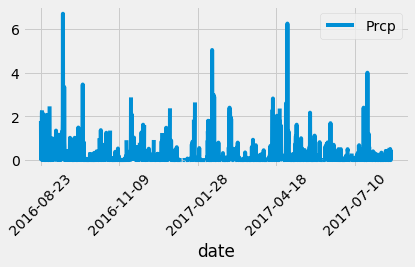

<Figure size 432x288 with 0 Axes>

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
last_year_s.plot()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.savefig('output/Prec12.png')

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data

last_year_s.describe()


,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset

session.query(station.station).count()


9

In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

session.query(measure.station, func.count(measure.station)).group_by(measure.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [37]:
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.station)).\
group_by(measure.station).order_by(func.count(measure.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).\
filter(measure.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [40]:
# Using the most active station id = USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_data = session.query(measure.date, measure.prcp).filter(measure.date >= '2016-08-23').\
filter(measure.station == 'USC00519281').all()
station_data


[('2016-08-23', 1.79),
 ('2016-08-24', 2.15),
 ('2016-08-25', 0.06),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.6),
 ('2016-08-29', 0.35),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.24),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.01),
 ('2016-09-03', 0.12),
 ('2016-09-04', 0.14),
 ('2016-09-05', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-08', 0.07),
 ('2016-09-09', 0.16),
 ('2016-09-10', 0.09),
 ('2016-09-11', 0.3),
 ('2016-09-12', 0.31),
 ('2016-09-13', 0.34),
 ('2016-09-14', 2.33),
 ('2016-09-15', 0.83),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.07),
 ('2016-09-19', 0.01),
 ('2016-09-20', 0.22),
 ('2016-09-21', 0.07),
 ('2016-09-22', 0.34),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.01),
 ('2016-09-25', 0.03),
 ('2016-09-26', 0.17),
 ('2016-09-27', 0.17),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.59),
 ('2016-09-30', 0.25),
 ('2016-10-01', 0.14),
 ('2016-10-02', 0.06),
 ('2016-10-03', 0.16),
 ('2016-10-04', 0.03),
 ('2016-10-05',

In [41]:
station_data_df = pd.DataFrame(station_data, columns = ["Date", "Prec"])
station_data_df.set_index("Date", inplace = True)
station_data_df = station_data_df.sort_index()
station_data_df.head()

,Prec
Date,
2016-08-23,1.79
2016-08-24,2.15
2016-08-25,0.06
2016-08-26,0.01
2016-08-27,0.12


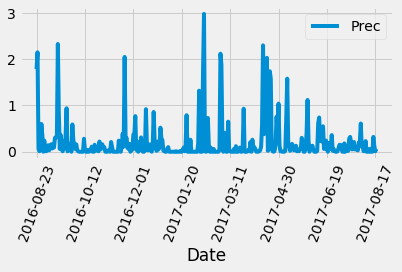

<Figure size 432x288 with 0 Axes>

In [46]:
station_data_df.plot()
plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

plt.savefig("output/PrecHist.png")

# Close session

In [ ]:
# Close Session
session.close()